In [1]:
import os
import glob
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anndata
from scipy.stats import spearmanr, pearsonr

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import sys
sys.path.append("../../")
from digitalhistopathology.clustering.clustering_utils import plot_ari_scores_all_patients
from digitalhistopathology.benchmark.benchmark_clustering import BenchmarkClustering

from PIL import Image
import matplotlib
Image.MAX_IMAGE_PIXELS = None
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

%matplotlib inline

2025-12-17 16:00:29.124117: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /software.9/software/code-server/4.93.1/lib
2025-12-17 16:00:29.124224: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /software.9/software/code-server/4.93.1/lib
2025-12-17 16:00:29.124231: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


/storage/homefs/ll25y867/.conda/envs/digitalhisto/lib/python3.10/site-packages/stlearn/tl/cci/het.py:206: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True, nopython=False)


# Unsupervised Clustering of TNBC dataset
This notebook contains the code to realize the plots of the unsupervised clustering of the TNBC dataset for the **base models**.

In [2]:
# Load configuration
with open("../../config/config_notebooks_TNBC.json", "r") as config_file:
    config = json.load(config_file)

In [3]:
# Initialize the BenchmarkClustering object
saving_folder=os.path.join(config['base_benchmark_folder'], "unsupervised_clustering_ARI", "kmeans")
extension='pdf'
benchmark_clustering = BenchmarkClustering(path_to_pipeline=config['path_to_base_pipelines'],
                                           pipelines_list=config['base_model_list'],
                                           results_folder="../../results",
                                           saving_folder=saving_folder,
                                           dataset=config['dataset'],
                                           extension=extension, 
                                           )

['uni', 'uni2', 'virchow', 'provgigapath', 'ctranspath', 'simclr']
<class 'list'>
Label files: []


In [4]:
# Set the variables
a = config["base_color_palette"]
sns.set_palette(a)
base_model_palette = config["base_model_palette"]
base_model_list = config["base_model_list"]
benchmark_folder = config["base_benchmark_folder"]

# Create results folder
os.makedirs(os.path.join(config['figures_folder'], "Figure2"), exist_ok=True)
os.makedirs(os.path.join(config['figures_folder'], "Figure3"), exist_ok=True)
os.makedirs(os.path.join(config['figures_folder'], "Figure4"), exist_ok=True)
os.makedirs(os.path.join(config['figures_folder'], "Figure5"), exist_ok=True)

## Comparison between linear and unlinear clustering

In [5]:
raw_clust = benchmark_clustering.unsupervised_clustering_benchmark(n_clusters=None, clustering_name='raw')
svd_clust = benchmark_clustering.unsupervised_clustering_benchmark(n_clusters=None, clustering_name='svd5')
umap_clust = benchmark_clustering.get_best_UMAP_ari_per_slide(force_loading=True)

# Add handcrafted features once computed
umap_clust["handcrafted_features"] = {}
for file in glob.glob(os.path.join(benchmark_clustering.saving_folder, f'best_umap_ari_model_handcrafted_features_patient_*.json')):
    patient_name = os.path.basename(file).split("_patient_")[1].split('.json')[0]
    with open(file, 'r') as f:
        umap_clust["handcrafted_features"][patient_name] = json.load(f)

Loading unsupervised clustering results for model uni...
Loading unsupervised clustering results for model uni2...
Loading unsupervised clustering results for model virchow...
Loading unsupervised clustering results for model provgigapath...
Loading unsupervised clustering results for model ctranspath...
Loading unsupervised clustering results for model simclr...
Loading unsupervised clustering results for model uni...
Loading unsupervised clustering results for model uni2...
Loading unsupervised clustering results for model virchow...
Loading unsupervised clustering results for model provgigapath...
Loading unsupervised clustering results for model ctranspath...
Loading unsupervised clustering results for model simclr...
Embeddings per patient: None
Force loading best UMAP parameters for model uni for existing patients...
Force loading best UMAP parameters for model ctranspath for existing patients...
Force loading best UMAP parameters for model virchow for existing patients...
Force 

In [6]:
for model in raw_clust.keys():
    print(f"Model: {model}: ari all: {raw_clust[model]['all']['ari']}, ari mean: {raw_clust[model]['mean']['ari']}")

Model: uni: ari all: 0.24181559049465756, ari mean: 0.3353989381110288
Model: uni2: ari all: 0.27478935435117996, ari mean: 0.3251135049300832
Model: virchow: ari all: 0.2734224568080426, ari mean: 0.39773595069423406
Model: provgigapath: ari all: 0.24735304005949224, ari mean: 0.3380081599122742
Model: ctranspath: ari all: 0.21429571419837035, ari mean: 0.3188864102076286
Model: simclr: ari all: 0.18425489792160496, ari mean: 0.2388426572696648


In [7]:
for model in raw_clust.keys():
    print(f"Model: {model}: ari tumor: {raw_clust[model]['ARI_tumor']}")

Model: uni: ari tumor: 0.01924608024415077
Model: uni2: ari tumor: 0.016880599202019578
Model: virchow: ari tumor: 0.01970648911750638
Model: provgigapath: ari tumor: 0.018199372273981558
Model: ctranspath: ari tumor: 0.01817290863007095
Model: simclr: ari tumor: 0.013451746743232483


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


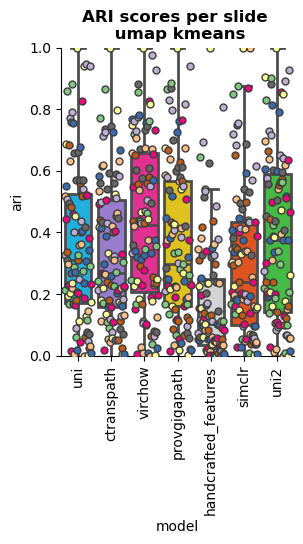

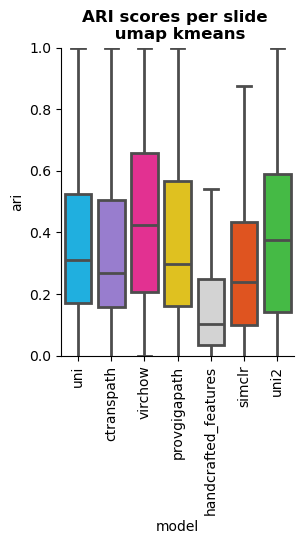

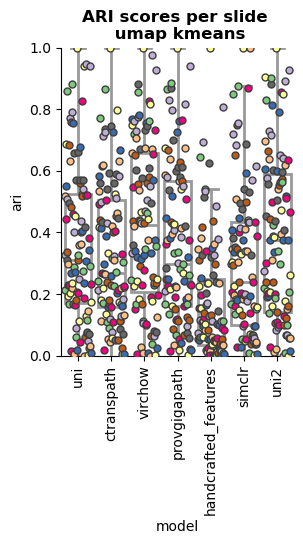

In [8]:
plt.figure(figsize=(3,4))
plot_ari_scores_all_patients(umap_clust, model_list=umap_clust.keys(), color_boxes=True, palette=base_model_palette)
plt.ylim(0, 1)
plt.title(f"ARI scores per slide \n umap kmeans", weight='bold')
# plt.savefig(os.path.join(config["figures_folder"],"Figure2/ARI_scores_boxplot_umap_kmeans_colored_with_patient.pdf"), bbox_inches='tight')
if len(umap_clust[base_model_list[0]]) > 15:
    plt.legend().remove()
    
plt.figure(figsize=(3,4))
plot_ari_scores_all_patients(umap_clust, model_list=umap_clust.keys(), stripplot=False, color_boxes=True, palette=base_model_palette)
plt.ylim(0, 1)
plt.title(f"ARI scores per slide \n umap kmeans", weight='bold')
# plt.savefig(os.path.join(config["figures_folder"],"Figure2/ARI_scores_boxplot_umap_kmeans_colored_without_patient.pdf"), bbox_inches='tight')
if len(umap_clust[base_model_list[0]]) > 15:
    plt.legend().remove()
    
plt.figure(figsize=(3,4))
plot_ari_scores_all_patients(umap_clust, model_list=umap_clust.keys(), stripplot=True, color_boxes=False)
plt.ylim(0, 1)
plt.title(f"ARI scores per slide \n umap kmeans", weight='bold')
# plt.savefig(os.path.join(config["figures_folder"],"Figure2/ARI_scores_boxplot_umap_kmeans_no_color_with_patient.pdf"), bbox_inches='tight')
if len(umap_clust[base_model_list[0]]) > 15:
    plt.legend().remove()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


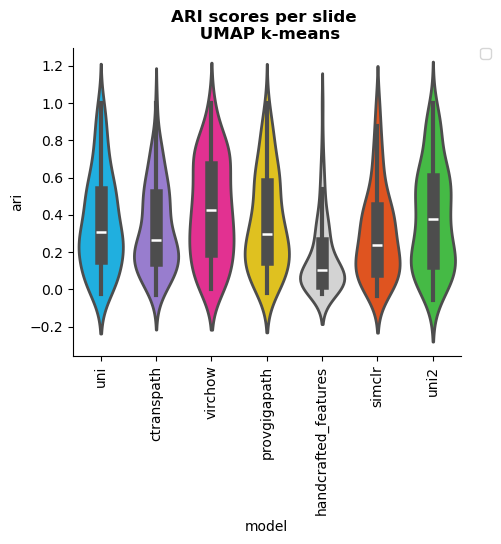

In [9]:
ari_scores = {}
for model in umap_clust.keys():
    ari_scores[model] = {}
    for patient in umap_clust[model].keys():
        if (patient != 'all') and (patient != 'mean'):
            ari_scores[model][patient] = umap_clust[model][patient]['ari']
df_aris = pd.DataFrame.from_dict(ari_scores)
df_aris_melted = pd.melt(df_aris, var_name='model', value_name='ari')
df_aris_melted['patient'] = df_aris.index.to_list()*len(df_aris.columns)

plt.figure(figsize=(5,4))
sns.violinplot(data=df_aris_melted, x='model', y='ari', hue='model', linewidth=2, palette=base_model_palette)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.title(f'ARI scores per slide \n UMAP k-means', weight='bold')
plt.show()

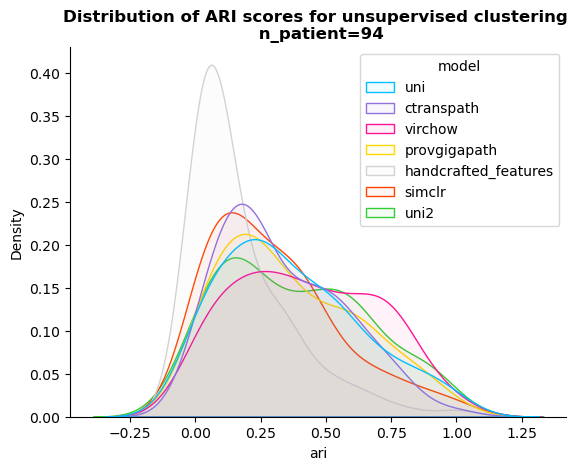

In [10]:
sns.kdeplot(data=df_aris_melted, x='ari', hue='model', fill=True, alpha=0.05, palette=base_model_palette)
sns.despine()
plt.title(f'Distribution of ARI scores for unsupervised clustering \n n_patient={len(list(umap_clust[list(umap_clust.keys())[0]].keys()))}', weight='bold')
plt.show()

In [11]:
dfs_clust = []
for clustering_dict, method in zip([raw_clust, svd_clust, umap_clust], ["raw", "svd", "umap"]):
    ari_scores = {}
    for model in clustering_dict.keys():
        ari_scores[model] = {}
        for patient in clustering_dict[model].keys():
            if patient != "ARI_tumor":
            #if (patient != 'all') and (patient != 'mean'):
                ari_scores[model][patient] = clustering_dict[model][patient]['ari']
    df_aris = pd.DataFrame.from_dict(ari_scores)
    df_aris_melted = pd.melt(df_aris, var_name='model', value_name='ari')
    df_aris_melted['patient'] = df_aris.index.to_list()*len(df_aris.columns)
    df_aris_melted['clustering'] = method
    dfs_clust.append(df_aris_melted)

df_comp = pd.concat(dfs_clust)

In [12]:
df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').agg(['mean', 'std'])

ari          
                  mean       std
model                           
ctranspath    0.317797  0.234872
provgigapath  0.337064  0.243975
simclr        0.238274  0.217852
uni           0.334424  0.257511
uni2          0.324589  0.242351
virchow       0.396441  0.240646

In [13]:
# Correlation with shannon entropy
with open(os.path.join(benchmark_folder, "shannon_entropy", "shannon_entropy_all_comps_raw.json")) as f:
    shannon_entropy = json.load(f)

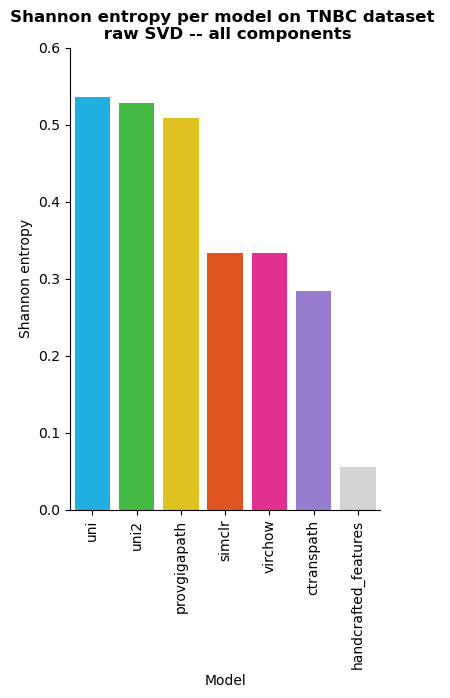

In [14]:
plt.figure(figsize=(4, 6))
df_shannon = pd.DataFrame.from_dict(shannon_entropy, orient='index', columns=['shannon_entropy'])
df_shannon.rename(index={'handcrafted': 'handcrafted_features'}, inplace=True)
df_shannon.sort_values('shannon_entropy', inplace=True, ascending=False)
sns.barplot(data=df_shannon, 
            x=df_shannon.index, 
            y='shannon_entropy', 
            hue=df_shannon.index, palette=base_model_palette)
sns.despine()
plt.xlabel("Model")
plt.ylabel("Shannon entropy")
plt.title(f"Shannon entropy per model on {config['dataset']} dataset \n raw SVD -- all components", weight='bold')
plt.xticks(rotation=90)
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy.pdf"), bbox_inches='tight')
plt.ylim(0, 0.6)
plt.show()

In [15]:
ari_raw = pd.DataFrame.from_dict({model: {patient: raw_clust[model][patient]['ari'] for patient in raw_clust[model].keys() if patient not in ["ARI_tumor"]} for model in raw_clust.keys()})
df_raw_overall = pd.DataFrame(ari_raw.loc["all"])
df_raw_overall.columns = ['ari']

ari_svd = pd.DataFrame.from_dict({model: {patient: svd_clust[model][patient]['ari'] for patient in svd_clust[model].keys()  if patient != 'ARI_tumor'} for model in svd_clust.keys()})
df_svd_overall = pd.DataFrame(ari_svd.loc["all"])
df_svd_overall.columns = ['ari']

In [16]:
ari_umap_overall = benchmark_clustering.get_best_UMAP_ari_overall()   
df_umap_overall = pd.DataFrame(ari_umap_overall).T[['ari']]

Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model ctranspath...
Loading best UMAP parameters for model ctranspath...
Computing best UMAP parameters for model simclr...
Loading best UMAP parameters for model simclr...


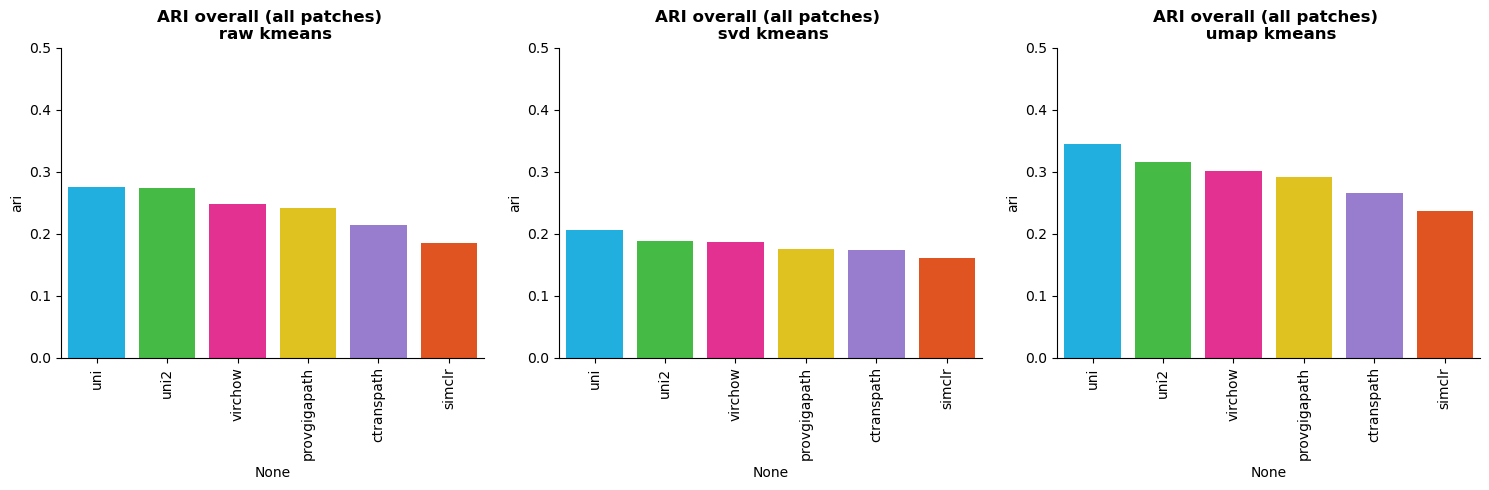

In [17]:
plt.figure(figsize=(15, 5))

names = ["raw kmeans", "svd kmeans", "umap kmeans"]

for i, df_ari_overall in enumerate([df_raw_overall, df_svd_overall, df_umap_overall]):
    plt.subplot(1, 3, 1 + i)
    sns.barplot(data=df_ari_overall.sort_values("ari", ascending=False), x=df_ari_overall.index, y="ari", hue=df_ari_overall.index, palette=base_model_palette)
    plt.xticks(rotation=90)
    sns.despine()
    plt.tight_layout()
    plt.ylim(0, 0.5)
    plt.title(f"ARI overall (all patches) \n {names[i]}", weight='bold')

plt.savefig(os.path.join(config['figures_folder'], "Figure2/unsupervised_clustering_raw_svd_umap_barplot.pdf"), bbox_inches='tight')

In [18]:
mean_ari_per_model = df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').mean()
std_ari_per_model = df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').std()

for model in mean_ari_per_model.index:
    shannon_value = df_shannon.loc[model, 'shannon_entropy']
    mean_ari_value = mean_ari_per_model.loc[model, 'ari']
    print(f"Model: {model}, Mean ARI: {mean_ari_value:.2f}, STD ARI: {std_ari_per_model.loc[model, 'ari']:.2f}")

Model: ctranspath, Mean ARI: 0.33, STD ARI: 0.23
Model: handcrafted_features, Mean ARI: 0.17, STD ARI: 0.20
Model: provgigapath, Mean ARI: 0.36, STD ARI: 0.26
Model: simclr, Mean ARI: 0.30, STD ARI: 0.25
Model: uni, Mean ARI: 0.36, STD ARI: 0.26
Model: uni2, Mean ARI: 0.38, STD ARI: 0.28
Model: virchow, Mean ARI: 0.42, STD ARI: 0.27


## Correlation ARI and shannon entropy

In [19]:
df_shannon.rename(index={'handcrafted': 'handcrafted_features'}, inplace=True)

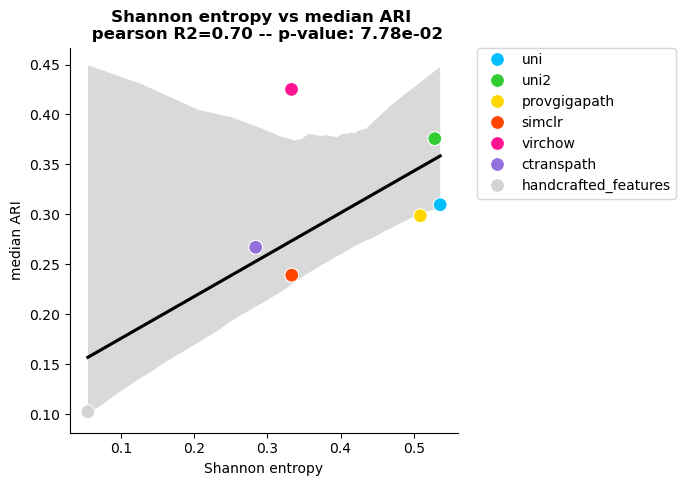

In [20]:
median_ari_per_model = df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').median()
median_ari_per_model.columns = ['median_ari']
df_model_summary = df_shannon.merge(median_ari_per_model, left_index=True, right_index=True)

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['median_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='median_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='median_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100, zorder=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('median ARI')
plt.title(f'Shannon entropy vs median ARI \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_median_ari.pdf"), bbox_inches='tight')

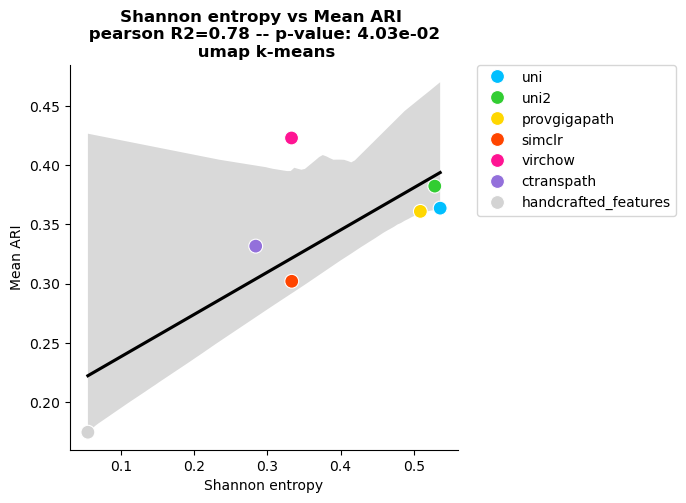

In [21]:
mean_ari_per_model = df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').mean()
mean_ari_per_model.columns = ['mean_ari']
df_model_summary = df_shannon.merge(mean_ari_per_model, left_index=True, right_index=True)

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e} \n umap k-means', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_mean_ari_umapkmeans.pdf"), bbox_inches='tight')

In [22]:
overall_umap = benchmark_clustering.get_best_UMAP_ari_overall(annotated_only=True)
    
overall_umap_aris = {}
for model in overall_umap.keys():
    overall_umap_aris[model] = overall_umap[model]['ari']

overall_umap_aris["handcrafted_features"] = json.load(open(os.path.join(benchmark_clustering.saving_folder, f'best_umap_ari_model_handcrafted_features_all_annotated_only.json')))['ari']

df_model_summary['overall_ari'] = pd.Series(overall_umap_aris)

Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model ctranspath...
Loading best UMAP parameters for model ctranspath...
Computing best UMAP parameters for model simclr...
Loading best UMAP parameters for model simclr...


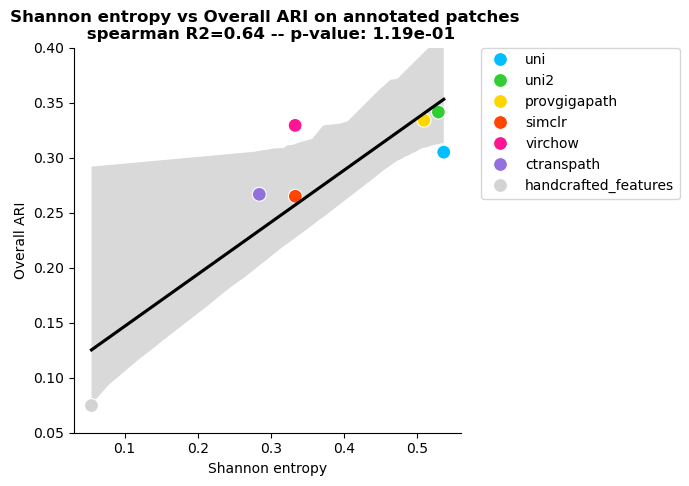

In [23]:
s, p = spearmanr(df_model_summary['shannon_entropy'], df_model_summary['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Overall ARI')
plt.title(f'Shannon entropy vs Overall ARI on annotated patches \n spearman R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_overall_ari_annotated_only.pdf"), bbox_inches='tight')
plt.ylim(0.05, 0.4)
plt.show()

Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model ctranspath...
Loading best UMAP parameters for model ctranspath...
Computing best UMAP parameters for model simclr...
Loading best UMAP parameters for model simclr...


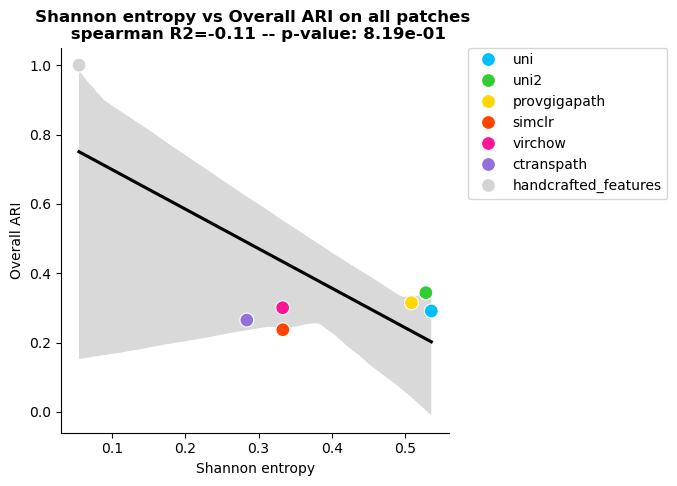

In [24]:
overall_umap = benchmark_clustering.get_best_UMAP_ari_overall()
    
overall_umap_aris = {}
for model in overall_umap.keys():
    overall_umap_aris[model] = overall_umap[model]['ari']
overall_umap_aris["handcrafted_features"] = json.load(open(os.path.join(benchmark_clustering.saving_folder, f'best_umap_ari_model_handcrafted_features_all.json')))['ari']

df_model_summary['overall_ari'] = pd.Series(overall_umap_aris)

s, p = spearmanr(df_model_summary['shannon_entropy'], df_model_summary['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100, zorder=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Overall ARI')
plt.title(f'Shannon entropy vs Overall ARI on all patches \n spearman R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_overall_ari.pdf"), bbox_inches='tight')

In [25]:
df_model_summary2 = df_comp.merge(df_shannon, left_on='model', right_index=True, how='left')

In [26]:
with open(os.path.join(config['base_benchmark_folder'], "shannon_entropy", "shannon_entropy_per_tumor_all_comps_raw.json")) as f:
    shannon_per_patient = json.load(f)
df_shannon_per_patient = pd.DataFrame.from_dict(shannon_per_patient, orient='index')

df_model_summary2 = df_comp[df_comp["clustering"] == 'umap'].merge(df_shannon_per_patient, left_on='patient', right_index=True, how='left')
df_shannon_per_patient_melted = pd.melt(df_shannon_per_patient, var_name='patient', value_name='shannon_entropy_per_patient')
df_shannon_per_patient_melted['model'] = list(df_shannon_per_patient.index) * len(df_shannon_per_patient.columns)

if config['dataset'] == 'HER2':
    df_comp['patient'] = df_comp['patient'].apply(lambda x: x[0])
else:
    df_comp['patient'] = df_comp['patient'].apply(lambda x: x.split('_')[0])
    
df_shannon_per_patient_melted["model"] = df_shannon_per_patient_melted["model"].apply(lambda x: x.replace("handcrafted", "handcrafted_features"))

df_model_summary2 = df_comp[df_comp["clustering"] == 'umap'].merge(df_shannon_per_patient_melted, on=['patient', 'model'])

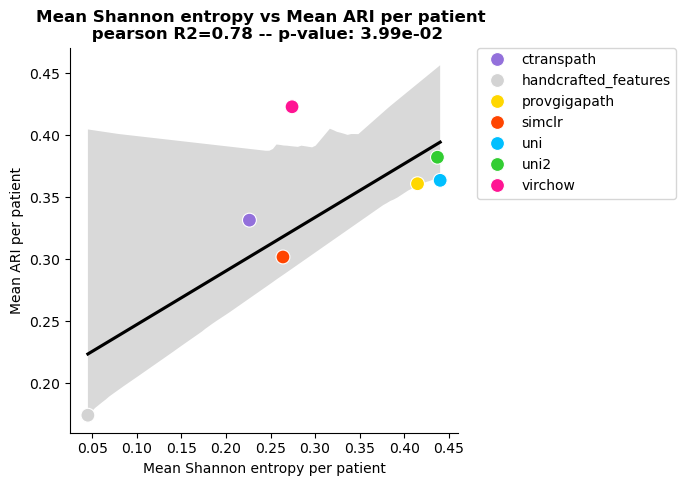

In [27]:
mean_vs_mean = df_model_summary2.groupby('model').mean(numeric_only=True)

s, p = pearsonr(mean_vs_mean['shannon_entropy_per_patient'], mean_vs_mean['ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=mean_vs_mean, x='shannon_entropy_per_patient', y='ari', color='black')
sns.scatterplot(data=mean_vs_mean, x='shannon_entropy_per_patient', y='ari', hue=mean_vs_mean.index,
                palette=base_model_palette, s=100, zorder=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Mean Shannon entropy per patient')
plt.ylabel('Mean ARI per patient')
plt.title(f'Mean Shannon entropy vs Mean ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/mean_shannon_entropy_vs_mean_ari.pdf"), bbox_inches='tight')

## Correlation with the number of parameters

In [28]:
parameters = {'provgigapath': 1135, 'uni2': 681, 'virchow': 632, 'uni': 303, 'ctranspath': 28, 'simclr': 24}
embedding_size = {'provgigapath': 1536, 'uni2': 1536, 'virchow': 1280, 'uni': 1024, 'ctranspath': 768, 'simclr': 512}

In [29]:
df_shannon

df_parameters = pd.DataFrame.from_dict(parameters, orient='index', columns=['n_parameters'])
df_parameters = df_parameters.merge(df_shannon, left_index=True, right_index=True)

df_embedding_size = pd.DataFrame.from_dict(embedding_size, orient='index', columns=['embedding_size'])
df_embedding_size = df_embedding_size.merge(df_shannon, left_index=True, right_index=True)

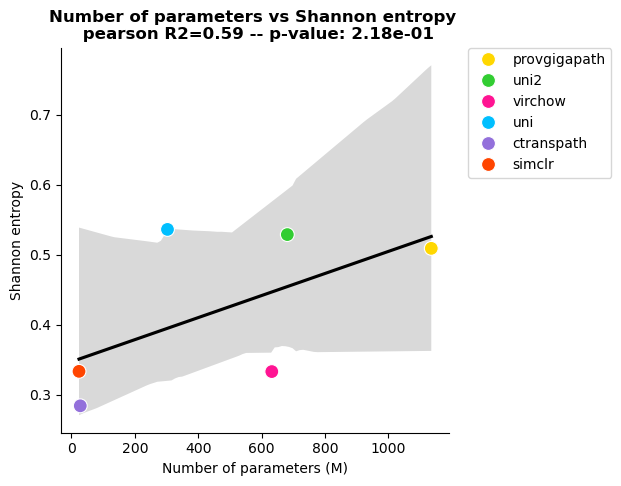

In [30]:
# Compute pearson correlation
s, p = pearsonr(df_parameters['n_parameters'], df_parameters['shannon_entropy'])
plt.figure(figsize=(5, 5))
sns.regplot(df_parameters, x='n_parameters', y='shannon_entropy', color='black')
sns.scatterplot(df_parameters, x='n_parameters', y='shannon_entropy', hue=df_parameters.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('Shannon entropy')
plt.title(f"Number of parameters vs Shannon entropy \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/embedding_size_vs_shannon_entropy.pdf"), bbox_inches='tight')

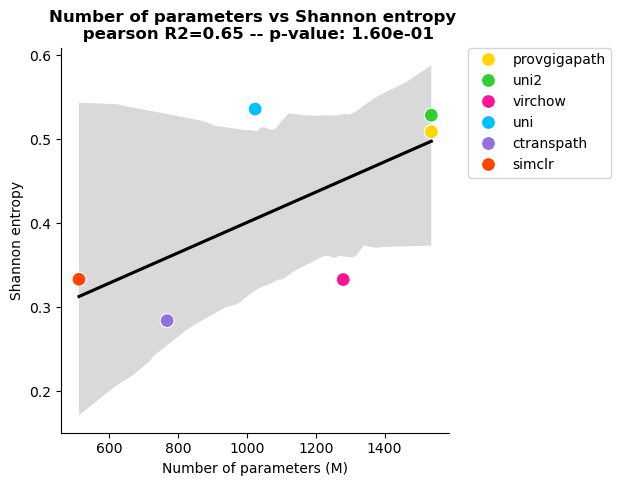

In [31]:
# Compute pearson correlation
s, p = pearsonr(df_embedding_size['embedding_size'], df_embedding_size['shannon_entropy'])
plt.figure(figsize=(5, 5))
sns.regplot(df_embedding_size, x='embedding_size', y='shannon_entropy', color='black')
sns.scatterplot(df_embedding_size, x='embedding_size', y='shannon_entropy', hue=df_embedding_size.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('Shannon entropy')
plt.title(f"Number of parameters vs Shannon entropy \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/number_of_parameters_vs_shannon_entropy.pdf"), bbox_inches='tight')

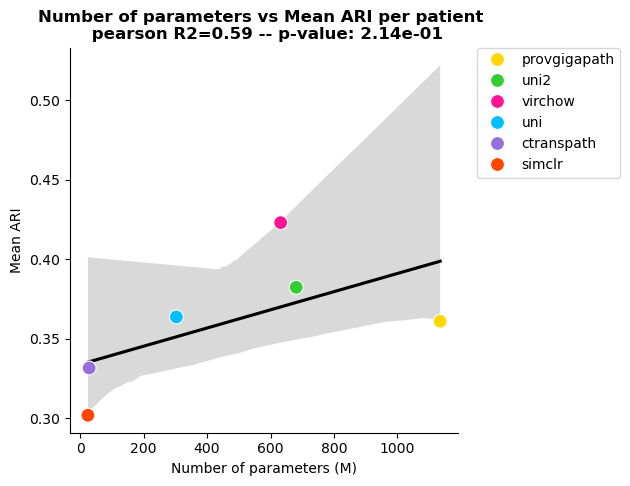

In [32]:
df_parameters = df_parameters.merge(df_model_summary[['mean_ari']], left_index=True, right_index=True)
s, p = pearsonr(df_parameters['n_parameters'], df_parameters['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(df_parameters, x='n_parameters', y='mean_ari', color='black')
sns.scatterplot(df_parameters, x='n_parameters', y='mean_ari', hue=df_parameters.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('Mean ARI')
plt.title(f"Number of parameters vs Mean ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/number_of_parameters_vs_mean_ari.pdf"), bbox_inches='tight')

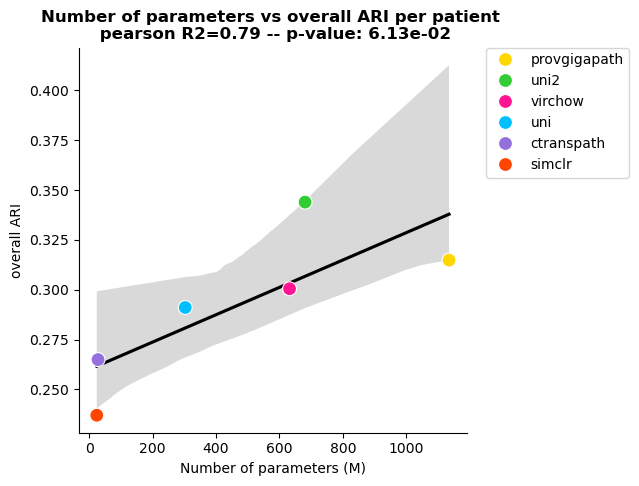

In [33]:
df_parameters = df_parameters.merge(df_model_summary[['overall_ari']], left_index=True, right_index=True)
s, p = pearsonr(df_parameters['n_parameters'], df_parameters['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(df_parameters, x='n_parameters', y='overall_ari', color='black')
sns.scatterplot(df_parameters, x='n_parameters', y='overall_ari', hue=df_parameters.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('overall ARI')
plt.title(f"Number of parameters vs overall ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/number_of_parameters_vs_overall_ari.pdf"), bbox_inches='tight')

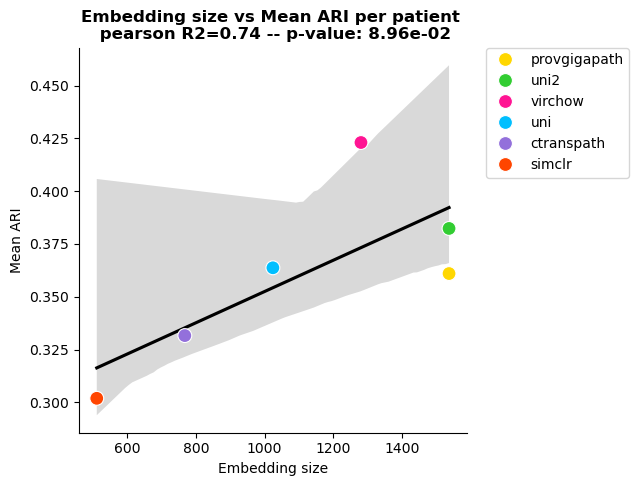

In [34]:
df_embedding_size = df_embedding_size.merge(df_model_summary[['mean_ari']], left_index=True, right_index=True)
s, p = pearsonr(df_embedding_size['embedding_size'], df_embedding_size['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(df_embedding_size, x='embedding_size', y='mean_ari', color='black')
sns.scatterplot(df_embedding_size, x='embedding_size', y='mean_ari', hue=df_embedding_size.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Embedding size')
plt.ylabel('Mean ARI')
plt.title(f"Embedding size vs Mean ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/embedding_size_vs_mean_ari.pdf"), bbox_inches='tight')